# Laboratoire 1 : Extraction de primitives
#### Département du génie logiciel et des technologies de l’information

| Étudiants             | Alexendre Bleau — BLEA14058906   David Létinaud  — LETD05129708  Thomas Lioret   — LIOT20069605|
|-----------------------|---------------------------------------------------------|
| Cours                 | GTI770 - Systèmes intelligents et apprentissage machine |
| Session               | Automne 2019                                            |
| Groupe                | 1                                                       |
| Numéro du laboratoire | 1                                                       |
| Professeur            | Prof. LOMBAERT                                          |
| Chargé de laboratoire | Pierre-Luc Delisle                                      |
| Date                  | 06/10/2019                                              |

In [1]:
#! /usr/bin/env python3 
# -*- coding: utf-8 -*-

"""
Course :
GTI770 — Systèmes intelligents et apprentissage machine
Project :
Lab # 1 — Définition et extraction de primitives
Students :
Alexendre Bleau — BLEA14058906
David Létinaud  — LETD05129708
Thomas Lioret   — LIOT20069605
Group :
GTI770-A19-01
"""

from skimage import io
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import Decision Tree Classifie
import sklearn.metrics as metrics

import csv
import matplotlib.pyplot as plt

from color import center_color,crop_center
from fourier_transform import fourier_transform
from binaryPattern import binaryPatterns

########################################   Initialisations   ########################################

image_path = "C:/Users/David/Desktop/GTI770/data/data/images/"
#image_path = '/Users/thomas/Desktop/COURS_ETS/gti770/data/images/'
dataset_path = "C:/Users/David/Desktop/GTI770/data/data/csv/galaxy/galaxy_label_data_set.csv"
#dataset_path = '/Users/thomas/Desktop/COURS_ETS/gti770/data/csv/galaxy/galaxy_label_data_set.csv'


# Nombre d'images total du dataset (training + testing)
nb_img = 160
# Pourcentage de données utilisées pour l'entrainement
ratio_train = 0.7
# Taille de rognage de l'image
crop_size = 180

X = [] # Contient les features de l'image
Y = [] # Contient les classes associées aux images 

# Paramètres de chaque features
fft_threshold = 140
color_center_size = 18
bp_calibration = [100,50]

def FeaturesProcess(img,cs_color,th_fft,nr_binaryPattern):
    """
    Fonction qui permet le calcul de chaque features d'img
    
    input :
        img (ndarray) : image quelconque
        cs_color (int) : taille du centre de l'image à prendre en compte pour calculer la moyenne du niveau de gris
        th_fft (int) : seuil à partir duquel on prend en compte les fréquences (strictement positif)
        nr_binaryPattern ([int,int]) : 
                    nr_binaryPattern[0] : nombre de points à prendre en compte sur le périmètre du cercle
                    nr_binaryPattern[1] : taille du rayon du cercle
    output : 
        (list) retourne la liste des features calculées
    
    """
    Features = []
    
    # plt.imshow(img)
    # plt.show()

    # Calculs des Features
    f_c = center_color(img,cs_color)
    f_fft = fourier_transform(img,th_fft)
    f_bp = binaryPatterns(img,nr_binaryPattern[0],nr_binaryPattern[1])  

    Features.append(f_c)   
    Features.append(f_fft)
    Features.append(f_bp)

    # Retourne les features calculés
    return Features    


########################################   Lecture   ########################################
# Lecture du fichier CSV
with open(dataset_path) as f:
    f_csv = csv.reader(f)
    next(f_csv) # On passe la 1ere ligne d'entête
    
    # Lecture ligne par ligne
    for ligne,i in zip(f_csv,range(nb_img)):
        
        # Lecture et rognage de l'image
        image = crop_center(io.imread( image_path + ligne[0] + ".jpg" ),crop_size,crop_size)
        
        # Calcul des features et stockage dans X
        X.append( FeaturesProcess(image, color_center_size, fft_threshold, bp_calibration) )
        # Sauvegarde de la classe correspondante dans Y
        Y.append(1 * (ligne[1]=="smooth"))  # smooth :1 et spiral : 0
       

########################################    Entrainement   ########################################
# Diviser l'ensemble de données en un ensemble d'apprentissage et un ensemble de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=ratio_train, random_state=1) # 70% training and 30% test

# Création d'un arbre de décision

clf = tree.DecisionTreeClassifier(max_depth=None)
clf = clf.fit(X_train,Y_train) 
plot_tree(clf, filled=True)
plt.show()

# Prévoir la réponse pour l'ensemble de données de test
Y_pred = clf.predict(X_test)

# Précision du modèle, à quelle fréquence le classificateur est-il correct ?
accuracy_tab = []
acc_ = metrics.accuracy_score(Y_test, Y_pred)
accuracy_tab.append(acc_)
print("Accuracy:",acc_) 

<Figure size 640x480 with 1 Axes>

Accuracy: 0.6875


### - Introduction et revue de la littérature

Dans le cadre de notre laboratoire, notre équipe avait pour objectif de créer une analyse et classification d’une série d’image de galaxie dans le but de séparer les résultats en deux types : smooth et spiral. Ce problème as déjà été résolu et ce, de différentes manières. Nous avons donc, dans un premier temps, étudié les différentes méthodes de résolution. Ensuite, nous nous sommes intéressés aux features permettant de différencier les galaxies. Après avoir codé trois features, nous avons ensuite construit des graphiques et un arbre de décision afin de tester l’efficacité de notre algorithme.

Il existe différentes techniques de classification des galaxies. Nous avons parcouru l’ensemble des articles mis à notre disposition, deux d’entre eux ont retenu notre attention. Ces deux articles proposent différentes solutions et feature pour résoudre le Galaxy zoo project [1,2]. Les difficultés proposées par ce challenge sont multiples et s’articulent notamment autour du traitement de l’image. En effet, les images présentent généralement du bruit et d’autres étoiles autour de la galaxie à étudier. Qui plus est, l’angle de vue de la photo prise par les satellites peut varier en fonction des galaxies. Par ailleurs, la qualité de l’image peut aussi avoir une influence sur la distinction des bras d’une galaxie qui fait une transition vers le type spiral. Afin de contourner ces problèmes, l'ensemble des articles étudiés proposent de redimensionner les images dans un premier temps afin de concentrer les traitements sur le centre des images. En effet, c’est au centre que se trouvent les informations essentielles à la discrimination des galaxies. Par ailleurs, les auteurs de l’article [3] proposent également de faire un traitement des images afin de limiter le bruit présent sur les images par une détection de contours. En suivant la même démarche, les auteurs de l’article [2] proposent d’utiliser un algorithme qui supprime le background de l’image afin d’avoir une classification de meilleure qualité. Nous pouvons également appliquer une rotation des images de galaxie afin qu’elles aient toutes leur axe principal vertical [2]. Le challenge de classification des galaxies soulève un grand nombre de problématiques auxquelles il faut faire face notamment autour du traitement préliminaire des données.


### - Étude des primitives 
Nous devions ensuite choisir les trois features à utiliser pour différencier les galaxies. Nous nous sommes intéressés au features qui nécessite seulement du traitement simple sur les images. En effet, nous n’avons pas encore toutes les clés pour utiliser les réseaux de neurones ou encore les détections de contours. Pour cela, nous nous sommes donc appuyés sur l’étude de l’article [1]. Les auteurs présentent les différents résultats et taux d’erreurs obtenus lors de leurs expériences. Nous avons donc par la suite choisi les algorithmes présentant le meilleur taux de validation : Center Color, Galaxy Binary patern et Fourier transform.

L’algorithme “center color” a pour objectif de récupérer le niveau de gris du centre de l’image. En effet, cette caractéristique permet de bien discriminer chacune des deux classes puisque le centre des galaxies de la classe “smooth” a tendance à être plus foncé que celui des galaxies de la classe “spiral”. L’algorithme que nous avons développé qui s’appuie sur la transformée de Fourier de l’image permet de calculer le nombre de fréquences spatiales dans l’image. En effet, une galaxie spiral présentera plus de fréquences spatiales qu’une galaxie smooth au vu des bras d’une spirale. Pour déterminer les meilleurs seuils possible, nous avons utilisé une méthode qui permet de choisir la valeur maximisant le taux d’accuracy.

L'algorithme qui s'appuie sur le Local binary paterne fonctionne comme suit. Après avoir transformé l’image en nuance de gris, on désigne un point central ainsi que son rayon, ce qui créer une zone de recherche circulaire. Nous comparons ce point aux autres pixels qui se situent dans la zone sélectionnée. Si la valeur du pixel comparé est supérieure à celle du pixel central, il prend la valeur de 1 sinon de 0. On fait par la suite le total des pixels de la zone pour redéfinir l’image en noir et blanc.Ceci nous donne une image codée selon sa texture. Comme le type de donnée n’est pas utilisable dans leur forme primaire, nous faisons l'entropie de la matrice fournie dans le but de nous fournir l’état de chaque image. Une image qui dispose de moins de zones noires comme une smooth retournera une valeur d'entropie plus basse qu’une galaxie de type ‘’spiral’’. Contrairement aux deux autres algorithmes, l’efficacité de celui-ci est directement liée à plusieurs paramètres. Le nombre de points à comparer, le rayon choisi et la taille de l’image. Une image qui a une résolution trop petite ne fournirait pas assez de données pour permettre de trouver une différence notoire à son entropie, il en va de même avec une image trop grande ou beaucoup de zones noires ne fourniraient pas un bon résultat. Si nous prenons un rayon trop grand, coupler avec un nombre de points à calculer élevé, on augmente le temps de calcule, mais si on prend une zone et un nombre de points trop petit on obtient des valeurs similaires et donc non discriminatoires. Par manque de temps et de connaissance, nous n’avons pas pris le risque de chercher les valeurs optimales par algorithme comme pour nos deux autres features. Cela dit elle reste efficace avec nos paramètres actuels.

Notre dernier feature, ‘’Center color’’, est probablement la plus efficace. Celle-ci calcule la valeur moyenne des couleurs RGB du centre d’une image de taille X et Y. Relativement simple a comprendre elle permet de différencier les centres de chaque galaxie selon leur couleur. Les valeurs retournées nous donnent une bonne discrimination . Par ailleurs dans le but d'améliorer nos résultats, nous avons implémenté un algorithme capable de tester les valeurs entre 1 et 50 ( taille de l’image) pour définir le résultat le plus discriminant, celui-ci étant une image de 18x18.


###  - Étude de la précision
La variable max_depth permet de gérer la profondeur maximale que l’on souhaite donner à l’arbre de décision. Par défaut, cette variable est initialisée à « None ». 

In [ ]:

for i in max_depth_tab:
    clf = tree.DecisionTreeClassifier(max_depth=i)

    # Construit les décision de l'arbre de classification
    clf = clf.fit(X_train,Y_train) 
    plot_tree(clf, filled=True)
    plt.show()

    # Prévoir la réponse pour l'ensemble de données de test
    Y_pred = clf.predict(X_test)

    acc_ = metrics.accuracy_score(Y_test, Y_pred)
    accuracy_tab.append(acc_)
    print("Accuracy:",acc_) 

max_depth_tab.insert(0, 0)
print(max_depth_tab,accuracy_tab)
# Affichage de la précision
plt.plot(max_depth_tab,accuracy_tab,'x--')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Etude de la précision en fonction de la profondeur de l arbre de décision')
plt.grid(True)
plt.show()



On peut étudier la variation de la précision en fonction de la profondeur de l'arbre, avec 1600 images, on obtient :
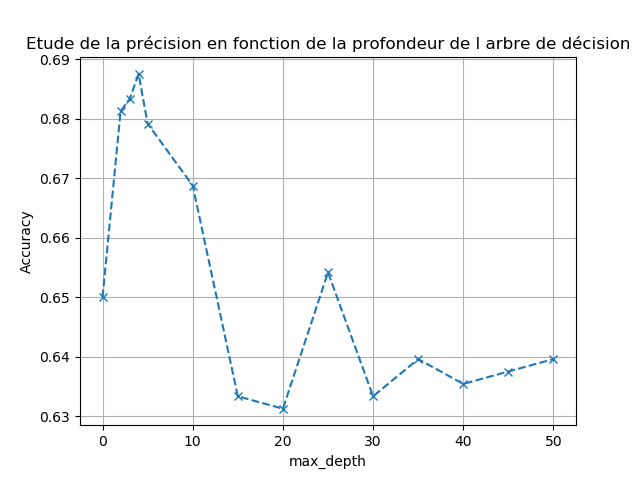
(Ici, 0 correspond à None).  
Toutefois, ce graphe n'est pas suffisant pour en tirer des conclusions quant au niveau de sous ou de sur-apprentissage.
Pour étudier ce phénomène, nous utiliserons la courbe ROC (Receiver Operating Characteristic) ainsi que son aire sous la courbe, AUC (Area under the curve ). ROC correspond à une courbe de probabilité alors qu'AUC réprésente la performance du modèle à faire la distinciton entre les classes.

In [ ]:

from sklearn.metrics import roc_curve, auc
 
# Faire varier max_depth selon la profondeur de l'arbre souhaité
max_depth_tab = [2,3,4,5,10,15,20,25,30,35,40,45,50]

# On peut toutefois améliorer cette étude en étudiant les courbes AUC et ROC
# Inspiré de : https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3
train_results = []
test_results = []

for i in max_depth_tab:
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, Y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    Y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth_tab, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depth_tab, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('Etude de la précision en fonction de la profondeur de l arbre de décision')
plt.grid(True)
plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.show()

La courbe ROC est créée en traçant le taux de vrais positifs par rapport au taux de faux positifs à différents seuils de réglage. Ici, nous réglerons la profondeur de l'arbre. On trace la courbe AUC du jeu de données d'entrainement et de celui de test sur 1600 images en fonction de max_depth :
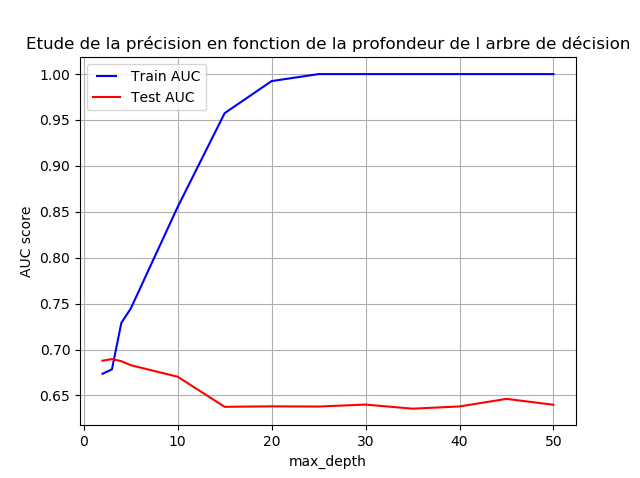
Ainsi, on peut remarquer que plus l'arbre est profond et plus la la courbe AUC du dataset d'entrainemet augmente. Toutefois, si l'on regarde celle du dataset de test, elle diminue. Ce phénomène est causé par un surapprentissage du modèle. En effet, l'arbre prédit parfaitement toutes les données d'entrainement, mais il ne permet pas de généraliser les résultats pour les nouvelles données. 
Ici, une profondeur entre 2 et 5 serait un bon compromis.


### - Améliorations
La feature qui aurait pu être utilisée afin d’améliorer nos résultats utilise l’algorithme principal component analysis (PCA). En effet, ceci permettrait de faire la détection de contours et ainsi améliorer la catégorisation des galaxies. En effet, comme son nom l’indique, les galaxies de type smooth ont des contours plus arrondis et homogènes contrairement aux galaxies spirales qui ont des bras et donc des contours plus abrupts.

### - Conclusion
Ainsi, en nous basant sur les features Center color, Local binary paterne et Fourier transform, nous obtenons un taux d’accuracy de 65%. Les résultats sont globalement satisfaisants pour une première approche du problème de classification de galaxie. Afin d’améliorer les performances de catégorisation, nous pourrions ajouter de nouvelles features afin d’augmenter le nombre de dimensions. Néanmoins, il faut faire attention à ne pas tomber dans un problème où les dimensions sont trop importantes, où les informations se recoupent.


### Bibliographie
Biblio [0] : Nom, P. ; Nom2, P2. : titre, ouvrage, date, page.
[1] : Chou, F.C. : Galaxy Zoo Challenge: Classify Galaxy Morphologies from Images, March 19, 2014.
[2] : Gauthier, A.; Jain, A.; Noordeh, E. : Galaxy Morphology Classification, December 16, 2016).
[3] : Abd Elfattah, M.; EI-Bendary, N.; Abu Elsoud, M.A.; Hassanien, A.E.; Tolba, M.P. : An Intelligent Approach for Galaxies Images Classification, 13th International Conference on Hybrid Intelligent Systems (HIS), 2013.
